<a href="https://colab.research.google.com/github/marantmir/PythonFundamentos/blob/master/Cap1_Fase3_DurabiliteAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISE DE DADOS DA EMPRESA MELHORES COMPRAS**


- INSTALANDO PACOTES E IMPORTANDO BIBLIOTECAS PARA ANÁLISE

In [ ]:
# Instalando o pacote atualizado do seaborn
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 5.0 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import csv
from pandas.core.groupby import NamedAgg
from scipy import stats as st
from functools import reduce
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

- IMPORTANDO ARQUIVO CSV E PADRONIZANDO O TIPO DE DADO

> Importamos os dados em csv e conferimos todos os tipos de dados para cada coluna, de forma a verificar a consistência dos dados

In [ ]:
# Importando os dados
dados_2019 = pd.read_csv('vendas_linha_petshop_2019.csv', sep = ";", decimal = ",", encoding = "ISO-8859-1")
dados_2020 = pd.read_csv('vendas_linha_petshop_2020.csv', sep = ";", decimal = ",", encoding = "ISO-8859-1")
dados_2021 = pd.read_csv('vendas_linha_petshop_2021.csv', sep = ";", decimal = ",", encoding = "ISO-8859-1")
dados_2022 = pd.read_csv('vendas_linha_petshop_2022.csv', sep = ";", decimal = ",", encoding = "ISO-8859-1")

In [ ]:
# Verificando o tipo do dado de 2019
dados_2019.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                    int64
quantidade             float64
valor_total_bruto        int64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
# Verificando o tipo do dado de 2020
dados_2020.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade              object
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
# Verificando o tipo do dado - 2021
dados_2021.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade              object
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
# Verificando o tipo do dado - 2022
dados_2022.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade             float64
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

> Verificamos que as colunas valor e valor_total_bruto em 2019 e quantiddade em 2020 e 2021 tinham tipos dedados diferentes. Então, tratamos o tipo do dado

In [ ]:
dados_2019['valor'] = dados_2019.valor.replace(" ",np.nan).astype(float)
dados_2019['valor_total_bruto'] = dados_2019.valor_total_bruto.replace(" ",np.nan).astype(float)
dados_2020['quantidade'] = dados_2020.quantidade.replace(" ",np.nan).astype(float) 
dados_2021['quantidade'] = dados_2021.quantidade.replace(" ",np.nan).astype(float)  

- AGRUPANDO AS TABELAS (MERGE) PARA REALIZAR UMA ANÁLISE ÚNICA
> Realizamos 2 merge, pois as função pd.merge só permite agrupar 2 tabelas por vez, e então, finalmente criamos o DataFrame "dados_analise" agrupando os dois merges anteriores.

In [ ]:
merge1 = pd.merge(dados_2019, dados_2020, how = 'outer')
merge2 = pd.merge(dados_2021, dados_2022, how = 'outer')

In [ ]:
dados_analise = pd.merge(merge1, merge2, how = 'outer')

- LENDO OS DADOS

> Solicitamos a leitura dos dados, para conferir o DataFrame criado

In [ ]:
dados_analise.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação
1,2,Norte,Biscoito True Champion 300g,21.0,2.0,42.0,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
2,3,Norte,Biscoito True Champion 300g,22.0,NaN,44.0,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação
3,4,Norte,Biscoito True Champion 300g,19.0,4.0,88.0,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação
4,5,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação


> Solicitamos um resumo estatístico de todas as colunas do DataFrame CRIADO

In [ ]:
dados_analise.describe()

,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
count,200786.000000,200786.000000,200119.000000,2.007860e+05,200786.000000,200786.000000
mean,100490.520290,111.089038,3.650638,4.209723e+02,13.466568,135.640172
std,58046.094844,215.258883,12.045057,1.021725e+04,156.029870,837.850280
min,1.000000,5.000000,0.000000,0.000000e+00,0.100000,1.500000
25%,50197.250000,28.000000,1.000000,3.600000e+01,0.660000,16.640000
50%,100587.500000,42.560000,1.000000,6.700000e+01,1.360000,25.600000
75%,150783.750000,85.000000,2.000000,1.276800e+02,3.800000,54.400000
max,200980.000000,1441.800000,110.000000,3.456346e+06,6837.600000,29304.000000


- DADOS MISSING

> Dados ausentes são uma das maiores dificuldades da etapa exploratória dos dados em um projeto. Excluir, completar ou ignorar são decisões de abordagem que devemos tomar quando nos deparamos com esse tipo de dado que pode divergir nossa análise. Abaixo verificamos a abordagem escolhida

 
1.   Na primeira fase analisamos a existência de Dados Missing a nível de linha e coluna

In [ ]:
# contando as linhas
missings_linha = pd.DataFrame({'cod_pedido': dados_analise['cod_pedido'].tolist(),
                                 'n_missings': dados_analise.isna().sum(axis=1).tolist()})
n_colunas = dados_analise.shape[1] - 1

# verificando os resultados
missings_linha    .assign(perc_missings = missings_linha['n_missings'] / n_colunas)

,cod_pedido,n_missings,perc_missings
0,1,0,0.000000
1,2,0,0.000000
2,3,1,0.076923
3,4,0,0.000000
4,5,0,0.000000
...,...,...,...
200781,200976,0,0.000000
200782,200977,0,0.000000
200783,200978,0,0.000000
200784,200979,0,0.000000


In [ ]:
# contando as colunas
missings_coluna = dados_analise.isna().sum()
missings_coluna = pd.DataFrame(missings_coluna,
                                columns=['n']).reset_index().rename(columns={'index':'variaveis'})

n_linhas = dados_analise.shape[0]

# verificando os resultados
missings_coluna    .assign( perc_missings = missings_coluna['n'] / n_linhas)    .sort_values('n', ascending = False)

,variaveis,n,perc_missings
4,quantidade,667,0.003322
0,cod_pedido,0,0.000000
1,regiao_pais,0,0.000000
2,produto,0,0.000000
3,valor,0,0.000000
5,valor_total_bruto,0,0.000000
6,data,0,0.000000
7,estado,0,0.000000
8,formapagto,0,0.000000
9,centro_distribuicao,0,0.000000


 
2.    Há presença de dados missing na coluna quantidade e utilizaremos a abordagem em que substituíremos os valores nulos pela mediana da coluna

In [ ]:
# Extraindo a mediana de quantidade
qtd_mediana = dados_analise.quantidade.median()

In [ ]:
# Preenchendo a coluna quantidade com a mediana
dados_analise.fillna(qtd_mediana, inplace=True)

In [ ]:
# Checando se há valor ausente
dados_analise.quantidade.isnull().sum()

0

- OUTLIERS

> Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.
Há diversas formas de observar e tratar os Outliers, abaixo verificaremos a abordagem escolhida

1. Optamos pela abordagem Box Plot na análise individual das colunas "quantidade" e "valor_total_bruto" e Scatterplot para correlacionar as colunas

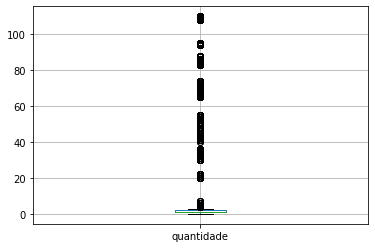

In [ ]:
# box plot - quantidade
dados_analise[['quantidade']].boxplot()



--- Não identificamos Outliers em quantidade



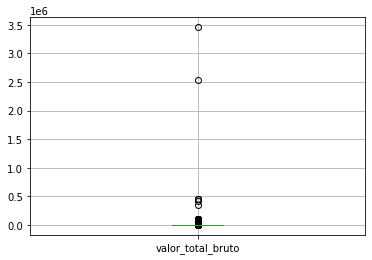

In [ ]:
# box plot - valor_total_bruto
dados_analise[['valor_total_bruto']].boxplot()

--- Identificamos Outliers na coluna valor_total_bruto

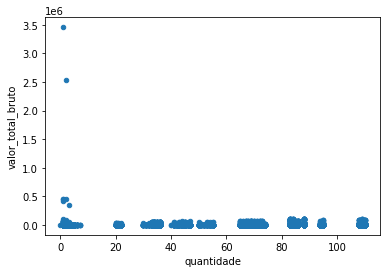

In [ ]:
# scatterplot - quantidade x valor da venda
dados_analise.plot.scatter (x = 'quantidade', y = 'valor_total_bruto')

--- Correlacionada ambas as variáveis, verificamos que o valor_total_bruto está muito alto em relação a quantidade, o que indica presença de Outliers.
É natural que o valor_total_bruto fosse maior em quantidades maiores, o que não foi caso na análise efetuada.

2. Tratamento dos Outliers

In [ ]:
# categorizar
dados_analise['bruto_total_cat'] = pd.qcut(dados_analise['valor_total_bruto'], q =4, labels = ['baixa', 'baixa-media', 'media-alta', 'alta'])
# ver dados
dados_analise[['cod_pedido','quantidade','valor_total_bruto', 'bruto_total_cat']].head()

,cod_pedido,quantidade,valor_total_bruto,bruto_total_cat
0,1,2.0,44.0,baixa-media
1,2,2.0,42.0,baixa-media
2,3,1.0,44.0,baixa-media
3,4,4.0,88.0,media-alta
4,5,2.0,44.0,baixa-media


In [ ]:
# obter os quartis
wins_values = dados_analise['valor_total_bruto'].quantile([0.05, 0.9]).to_list()
# winsorizar
dados_analise['valor_total_bruto_wins'] = dados_analise['valor_total_bruto'].clip(wins_values[0], wins_values[1])
# ver os dados
dados_analise[['cod_pedido', 'valor_total_bruto', 'valor_total_bruto_wins']].head(10)

,cod_pedido,valor_total_bruto,valor_total_bruto_wins
0,1,44.0,44.0
1,2,42.0,42.0
2,3,44.0,44.0
3,4,88.0,88.0
4,5,44.0,44.0
5,6,76.0,76.0
6,7,63.0,63.0
7,8,52.0,52.0
8,9,52.0,52.0
9,10,104.0,104.0


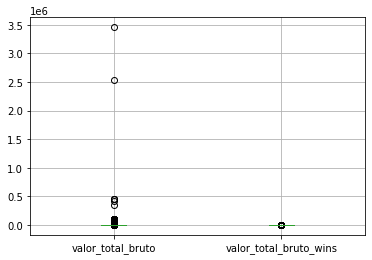

In [ ]:
# box plot
dados_analise[['valor_total_bruto', 'valor_total_bruto_wins']].boxplot()

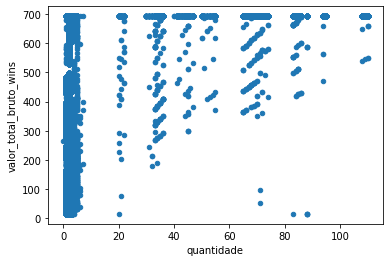

In [ ]:
# scatterplot - quantidade x valor da venda
dados_analise.plot.scatter (x = 'quantidade', y = 'valor_total_bruto_wins')

--- Por meio da análise do gráfico, verificamos que a transformação foi eficiente para ajustar os outliers sem a necessidade de eliminar as linhas existentes do banco de dados.

- SÉRIES TEMPORAIS

In [ ]:
# Verificando tipo de dado para tratamento
dados_analise.dtypes

cod_pedido                   int64
regiao_pais                 object
produto                     object
valor                      float64
quantidade                 float64
valor_total_bruto          float64
data                        object
estado                      object
formapagto                  object
centro_distribuicao         object
responsavelpedido           object
valor_comissao             float64
lucro_liquido              float64
categoriaprod               object
bruto_total_cat           category
valor_total_bruto_wins     float64
dtype: object

-- Criamos uma variável para trazer a data e o produto escolhido

In [ ]:
# Transformando a data em uma string para formartar em MM/YYYY e criando a variável para escolha do produto
dados_analise['data'] = pd.to_datetime(dados_analise['data'])
dados_analise_produto = dados_analise[dados_analise['produto'] == 'Biscoito True Champion 300G']

In [ ]:
# seleção das colunas
dados_analise_produto = dados_analise[['data', 'quantidade']]
# data para indice
dados_analise_produto.set_index('data', inplace=True) 
# data para indice
dados_analise_produto.head()

,quantidade
data,
2019-06-13,2.0
2019-03-01,2.0
2019-01-18,1.0
2019-08-19,4.0
2019-10-18,2.0


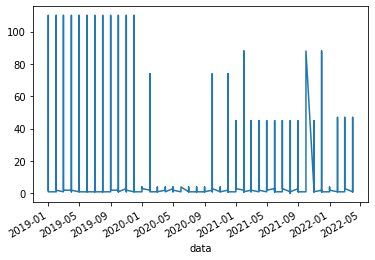

In [ ]:
# seleção das colunas
dados_analise_produto.plot(legend = None)

In [ ]:
# teste
teste_adf = adfuller(dados_analise_produto['quantidade'])
# valor da estatistica
print('Estatística ADF: {:.4}'.format(teste_adf[0]))
# p-value
print('p-value: {:.4}'.format(teste_adf[1]))

--- Sendo p-value = 0, verificamos que é uma série estacionária

- INSIGHTS

In [ ]:
# Venda por região 
dados_analise.groupby('regiao_pais')    .agg(dados_analise = pd.NamedAgg('valor_total_bruto', 'sum'))  

,dados_analise
regiao_pais,
Centro Oeste,16465384.93
Nordeste,22214467.09
Norte,20997169.47
Sudeste,15525689.27
Sul,9322639.58


In [ ]:
# Média Venda por região 
dados_analise.groupby('regiao_pais')    .agg(dados_analise = pd.NamedAgg('valor_total_bruto', 'mean'))   

,dados_analise
regiao_pais,
Centro Oeste,512.604991
Nordeste,460.833256
Norte,373.628412
Sudeste,386.528475
Sul,386.911790


In [ ]:
# Estado com mais venda
n = 1
dados_analise.groupby('estado')    .agg(vendas_total = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='vendas_total', ascending=False).head(n)

,vendas_total
estado,
Ceará,6871443.73




*   ANÁLISE DESCRITIVA


In [ ]:
# Venda por Categoria
dados_analise.groupby('categoriaprod')    .agg(categoria= pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='categoria', ascending=False)

,categoria
categoriaprod,
Bebedouros e Comedouros,27858086.20
Medicamento,19044225.47
Alimentação,17909329.07
Acessório,10177577.69
Higiene e Limpeza,4676440.87
Petisco,2863668.65
Brinquedo,1996022.39


In [ ]:
# Média por Categoria
dados_analise.groupby('categoriaprod')    .agg(media_categoria= pd.NamedAgg('valor_total_bruto', 'mean')) \
    .sort_values(by='media_categoria', ascending=False)

,media_categoria
categoriaprod,
Bebedouros e Comedouros,1668.348676
Medicamento,759.945150
Alimentação,534.287860
Acessório,202.635641
Higiene e Limpeza,186.609771
Petisco,113.981398
Brinquedo,79.529141


In [ ]:
# Mediana por Categoria
dados_analise.groupby('categoriaprod')    .agg(mediana_categoria= pd.NamedAgg('valor_total_bruto', 'median')) \
    .sort_values(by='mediana_categoria', ascending=False)

,mediana_categoria
categoriaprod,
Bebedouros e Comedouros,775.00
Medicamento,184.68
Alimentação,134.33
Higiene e Limpeza,62.00
Acessório,55.00
Petisco,46.98
Brinquedo,24.30


In [ ]:
# Desvio Padrão por Categoria
dados_analise.groupby('categoriaprod')    .agg(desviopadrao_categoria= pd.NamedAgg('valor_total_bruto', 'std')) \
    .sort_values(by='desviopadrao_categoria', ascending=False)

,desviopadrao_categoria
categoriaprod,
Medicamento,21967.789336
Alimentação,14163.724152
Bebedouros e Comedouros,8813.401379
Acessório,3396.153542
Higiene e Limpeza,2869.481434
Brinquedo,730.190921
Petisco,589.538585


In [ ]:
# Produto mais vendido
n = 10
dados_analise.groupby('produto')    .agg(qtd_prod = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_prod', ascending=False).head(n)

,qtd_prod
produto,
Biscoito True Champion 300g,38896.0
Shampoo vegano para cachorro e gato de camomila 250 ml,34649.0
Bola Pet Vinil Big Blue,34467.0
Suplemento Alimentar Glutamina Mundo Animal Nutrisana,34405.0
Ração Úmida Royal Canin Lata Veterinary Cães Adultos 500g,34388.0
"Ração Royal Canin Exigent Gatos Adultos 1,5Kg",33763.0
Whiskas Petisco Temptations Anti Bola de Pelo 40g,33668.0
Pote Petisco Para Cachorro Bifinho Sabor Carne 1Kg Amiguitos,33329.0
Bandana Disney Mickey Fábrica Petti,33040.0


In [ ]:
# Produto maior faturamento
n = 10
dados_analise.groupby('produto')    .agg(qtd_prod = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='valor_total_vendido', ascending=False).head(n)

-------------------------- FIM --------------------------------